In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
#GET THE DATA
df=pd.read_csv("kyphosis.csv")

In [7]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


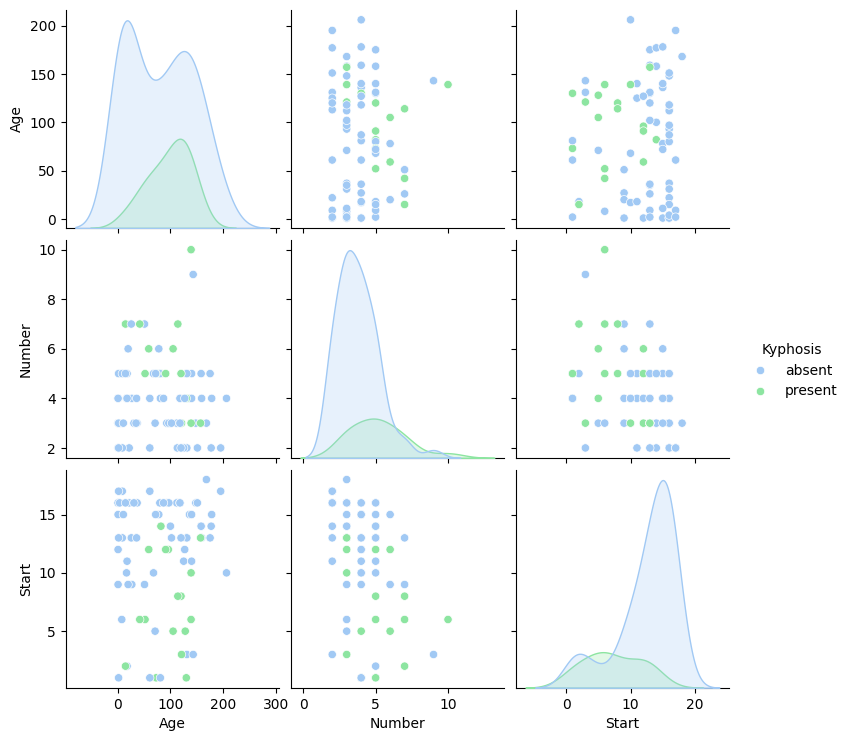

In [9]:
#EDA

sns.pairplot(df,hue="Kyphosis",palette="pastel6")

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X=df.drop("Kyphosis",axis=1)
y=df["Kyphosis"]

In [12]:
X
y

0      absent
1      absent
2     present
3      absent
4      absent
       ...   
76    present
77     absent
78     absent
79    present
80     absent
Name: Kyphosis, Length: 81, dtype: object

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dtree=DecisionTreeClassifier()

In [16]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [17]:
#prediction and evaluation
prediction = dtree.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [19]:
print(confusion_matrix(y_test,prediction))

[[18  1]
 [ 3  3]]


In [20]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

      absent       0.86      0.95      0.90        19
     present       0.75      0.50      0.60         6

    accuracy                           0.84        25
   macro avg       0.80      0.72      0.75        25
weighted avg       0.83      0.84      0.83        25



In [21]:
#TREE VISUALIZATION

from IPython.display import Image
import six
import sys
sys.modules["sklearn.externals.six"]=six

from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [22]:
pip install --upgrade pip 

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install six

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
Image(graph[0].create_png())

NameError: name 'StringIO' is not defined